# Exploring the proportion of land that is considered to be in a drought in Imperial & Riverside County
## Data was obtained from US Drought Monitoring System & WiFire Commons

First, I will import all the libraries I may need in the notebook

In [2]:
# import libraries
import geopandas as gpd
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import contextily as ctx

Next, I will upload the gjsn file that has the county boundaries. I also inspect the data set to determine which column name/variable I will use to merge the data with my csv file containing drought information. In this case, I am interested in extracting only the shapefile around Imperial & Riverside County, using the CountyName column.

In [3]:
counties_gdf = gpd.read_file('California_County_Boundaries.geojson')

In [4]:
counties_gdf.sample(10)

,OBJECTID,CountyName,AdminRegion,FireMAR,LawMAR,State_FIPS_ID,County_FIPS_ID,Shape__Area,Shape__Length,geometry
41,42,Santa Barbara,Southern Region,I,I A,06,083,1.055201e+10,8.255318e+05,"MULTIPOLYGON (((-120.07849 35.11334, -120.0786..."
13,14,Inyo,Southern Region,VI,VI,06,027,4.110168e+10,1.060549e+06,"POLYGON ((-118.77349 37.46403, -118.77362 37.4..."
0,1,Alameda,Coastal Region,II,II,06,001,3.082165e+09,4.320592e+05,"MULTIPOLYGON (((-122.26853 37.90446, -122.2687..."
27,28,Napa,Coastal Region,II,II,06,055,3.340058e+09,3.733816e+05,"POLYGON ((-122.39470 38.86442, -122.40042 38.8..."
55,56,Ventura,Southern Region,I,I A,06,111,7.125912e+09,4.778053e+05,"MULTIPOLYGON (((-119.37421 34.88004, -119.3792..."
15,16,Kings,Inland Region,V,V,06,031,5.529079e+09,3.543607e+05,"POLYGON ((-120.31373 35.90743, -120.31272 35.9..."
28,29,Nevada,Inland Region,IV,IV,06,057,4.217254e+09,4.314062e+05,"POLYGON ((-120.71593 39.48970, -120.71612 39.4..."
31,32,Plumas,Inland Region,III,III,06,063,1.155670e+10,6.542310e+05,"POLYGON ((-121.49618 40.44599, -121.49608 40.4..."
51,52,Tehama,Inland Region,III,III,06,103,1.313096e+10,6.197486e+05,"POLYGON ((-121.58877 40.43159, -121.58973 40.4..."
26,27,Monterey,Coastal Region,II,II,06,053,1.320962e+10,7.675379e+05,"POLYGON ((-120.50032 36.02265, -120.50057 36.0..."


After inspecting my csv file, I realized the column names did not match the gjsn file. I renamed the column, CountyName, and removed the word "county" in the values Riverside and Imperial.  

In [5]:
countydf=pd.read_csv('RiversideImperialDrought.csv')

In [6]:
countydf.sample(10)

,MapDate,FIPS,CountyName,State,None,D0,D1,D2,D3,D4,ValidStart,ValidEnd,StatisticFormatID
60,20221220,6065,Riverside,CA,0,3.99,84.83,11.18,0.00,0,12/20/2022,12/26/2022,2
43,20220412,6025,Imperial,CA,0,0.00,0.00,100.00,0.00,0,4/12/2022,4/18/2022,2
70,20221011,6065,Riverside,CA,0,0.00,10.96,89.04,0.00,0,10/11/2022,10/17/2022,2
94,20220426,6065,Riverside,CA,0,0.00,30.64,69.12,0.24,0,4/26/2022,5/2/2022,2
3,20230117,6025,Imperial,CA,0,47.65,52.35,0.00,0.00,0,1/17/2023,1/23/2023,2
100,20220315,6065,Riverside,CA,0,0.00,42.80,56.95,0.24,0,3/15/2022,3/21/2022,2
75,20220906,6065,Riverside,CA,0,0.00,0.04,99.96,0.00,0,9/6/2022,9/12/2022,2
4,20230110,6025,Imperial,CA,0,47.65,52.35,0.00,0.00,0,1/10/2023,1/16/2023,2
49,20220301,6025,Imperial,CA,0,0.00,7.82,92.18,0.00,0,3/1/2022,3/7/2022,2
68,20221025,6065,Riverside,CA,0,0.00,43.42,56.58,0.00,0,10/25/2022,10/31/2022,2


Now that both the column names, and values match, I can merge the files.

In [7]:
newdf= counties_gdf.merge(countydf, on="CountyName")

In [8]:
newdf.head()

,OBJECTID,CountyName,AdminRegion,FireMAR,LawMAR,State_FIPS_ID,County_FIPS_ID,Shape__Area,Shape__Length,geometry,...,State,None,D0,D1,D2,D3,D4,ValidStart,ValidEnd,StatisticFormatID
0,13,Imperial,Southern Region,VI,VI,06,025,1.656500e+10,593759.567299,"POLYGON ((-116.08439 33.42611, -116.08440 33.4...",...,CA,0,47.65,52.35,0.0,0.0,0,2/7/2023,2/13/2023,2
1,13,Imperial,Southern Region,VI,VI,06,025,1.656500e+10,593759.567299,"POLYGON ((-116.08439 33.42611, -116.08440 33.4...",...,CA,0,47.65,52.35,0.0,0.0,0,1/31/2023,2/6/2023,2
2,13,Imperial,Southern Region,VI,VI,06,025,1.656500e+10,593759.567299,"POLYGON ((-116.08439 33.42611, -116.08440 33.4...",...,CA,0,47.65,52.35,0.0,0.0,0,1/24/2023,1/30/2023,2
3,13,Imperial,Southern Region,VI,VI,06,025,1.656500e+10,593759.567299,"POLYGON ((-116.08439 33.42611, -116.08440 33.4...",...,CA,0,47.65,52.35,0.0,0.0,0,1/17/2023,1/23/2023,2
4,13,Imperial,Southern Region,VI,VI,06,025,1.656500e+10,593759.567299,"POLYGON ((-116.08439 33.42611, -116.08440 33.4...",...,CA,0,47.65,52.35,0.0,0.0,0,1/10/2023,1/16/2023,2


I use the basic plot function to verify that I clipped the geojsn file properly. 

<AxesSubplot: >

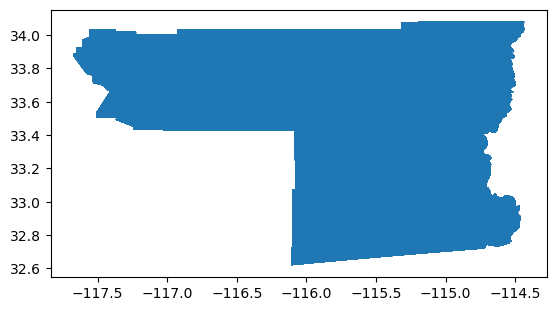

In [9]:
newdf.plot()

I am changing the column names to more informative values.

In [10]:
newdf = newdf.rename(columns={'D0': 'Abnormally Dry', 'D1':'Moderate Drought', 'D2': 'Severe Drought',  'D3': 'Extreme Drought','D4': 'Exceptional Drought'})
newdf

,OBJECTID,CountyName,AdminRegion,FireMAR,LawMAR,State_FIPS_ID,County_FIPS_ID,Shape__Area,Shape__Length,geometry,...,State,None,Abnormally Dry,Moderate Drought,Severe Drought,Extreme Drought,Exceptional Drought,ValidStart,ValidEnd,StatisticFormatID
0,13,Imperial,Southern Region,VI,VI,06,025,1.656500e+10,593759.567299,"POLYGON ((-116.08439 33.42611, -116.08440 33.4...",...,CA,0,47.65,52.35,0.00,0.00,0,2/7/2023,2/13/2023,2
1,13,Imperial,Southern Region,VI,VI,06,025,1.656500e+10,593759.567299,"POLYGON ((-116.08439 33.42611, -116.08440 33.4...",...,CA,0,47.65,52.35,0.00,0.00,0,1/31/2023,2/6/2023,2
2,13,Imperial,Southern Region,VI,VI,06,025,1.656500e+10,593759.567299,"POLYGON ((-116.08439 33.42611, -116.08440 33.4...",...,CA,0,47.65,52.35,0.00,0.00,0,1/24/2023,1/30/2023,2
3,13,Imperial,Southern Region,VI,VI,06,025,1.656500e+10,593759.567299,"POLYGON ((-116.08439 33.42611, -116.08440 33.4...",...,CA,0,47.65,52.35,0.00,0.00,0,1/17/2023,1/23/2023,2
4,13,Imperial,Southern Region,VI,VI,06,025,1.656500e+10,593759.567299,"POLYGON ((-116.08439 33.42611, -116.08440 33.4...",...,CA,0,47.65,52.35,0.00,0.00,0,1/10/2023,1/16/2023,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,33,Riverside,Southern Region,VI,VI,06,065,2.741787e+10,907833.753925,"POLYGON ((-116.26057 34.03451, -116.26374 34.0...",...,CA,0,0.00,42.80,56.95,0.24,0,3/8/2022,3/14/2022,2
102,33,Riverside,Southern Region,VI,VI,06,065,2.741787e+10,907833.753925,"POLYGON ((-116.26057 34.03451, -116.26374 34.0...",...,CA,0,0.00,42.80,56.95,0.24,0,3/1/2022,3/7/2022,2
103,33,Riverside,Southern Region,VI,VI,06,065,2.741787e+10,907833.753925,"POLYGON ((-116.26057 34.03451, -116.26374 34.0...",...,CA,0,0.00,77.41,22.59,0.00,0,2/22/2022,2/28/2022,2
104,33,Riverside,Southern Region,VI,VI,06,065,2.741787e+10,907833.753925,"POLYGON ((-116.26057 34.03451, -116.26374 34.0...",...,CA,0,0.00,77.41,22.59,0.00,0,2/15/2022,2/21/2022,2


Next, I project my file to the mercator system so that I can add a basemap later on.

In [13]:
newdf_mercator = newdf.to_crs(3857)

<AxesSubplot: >

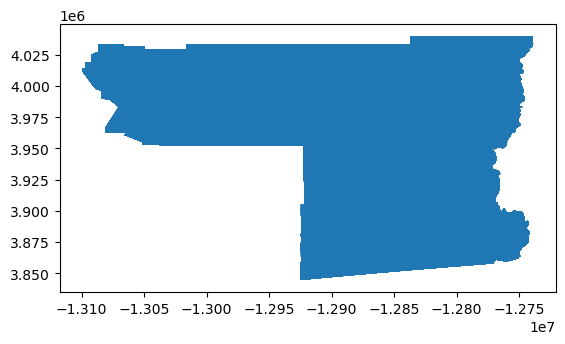

In [14]:
newdf_mercator.plot()

# Adding BaseMap & Analyzing different levels of Drought in Imperial County

Here, I create two graphs displaying different levels of drought. Where D1 is Moderate Drought and D2 is Severe Drought. The Bar on the right hand side is the proportion of land in each county that is classified to be experience either Moderate or Severe Drought. I do not include maps for D0, D3, or D4, as none of the area is currently experiencing that level of drought. 


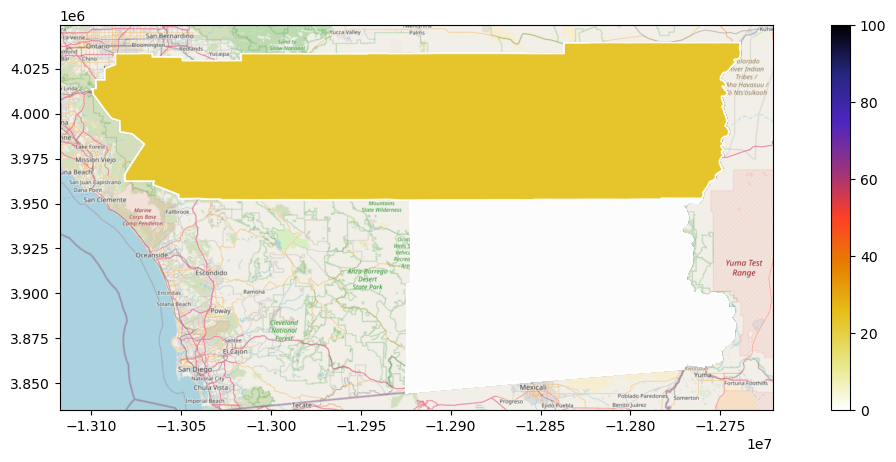

In [17]:
# create plot
fig, ax = plt.subplots(figsize=(15,5))

# plot earthquakes
#column= color -- when you give matplot lib a numeric column, it automatically creates a gradient 
#alpha= opacity
newdf_mercator.plot(ax=ax,
    markersize=200,
    edgecolor='white',
    alpha=0.8,
    column='Severe Drought',
    cmap='CMRmap_r',
    legend=True)

# add osm basemap
ctx.add_basemap(ax=ax, source='http://tile.openstreetmap.org/{z}/{x}/{y}.png')

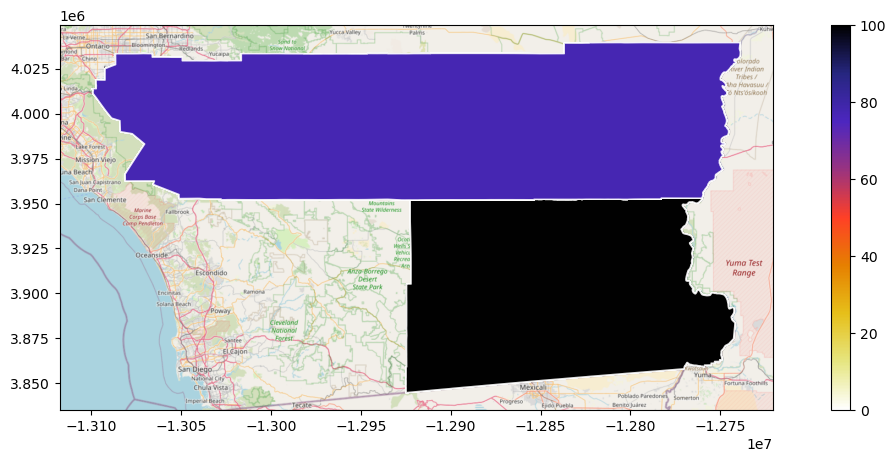

In [19]:
# create plot
fig, ax = plt.subplots(figsize=(15,5))

# plot earthquakes
#column= color -- when you give matplot lib a numeric column, it automatically creates a gradient 
#alpha= opacity
newdf_mercator.plot(ax=ax,
    markersize=200,
    edgecolor='white',
    alpha=0.8,
    column='Moderate Drought',
    cmap='CMRmap_r',
    legend=True)

# add osm basemap
ctx.add_basemap(ax=ax, source='http://tile.openstreetmap.org/{z}/{x}/{y}.png')